In [1]:
dtype_spec = {
    'latitude': 'float64',
    'longitude': 'float64',
    'geocode': 'object',
    'essence': 'object',
    'RES_CO_REG': 'object'
}

csv_file_path = 'data/Full_dataset_clustering.csv'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns

In [3]:
db = pd.read_csv(csv_file_path, dtype=dtype_spec)

In [4]:
db.columns

Index(['Unnamed: 0', 'essence', 'latitude', 'forest', 'longitude', 'elev',
       'ph', 'clay', 'sand', 'bio1', 'bio2', 'bio3', 'bio8', 'bio9', 'bio10',
       'bio11', 'bio12', 'bio14', 'bio15', 'bio18', 'bio20', 'bio23', 'bio24',
       'bio27', 'bio30', 'bio31', 'bio34', 'cluster_k'],
      dtype='object')

In [5]:
db

,Unnamed: 0,essence,latitude,forest,longitude,elev,ph,clay,sand,bio1,...,bio15,bio18,bio20,bio23,bio24,bio27,bio30,bio31,bio34,cluster_k
0,577458,EO,47.761208,100,-73.022446,344,4.5000,85.0,85.0,1.765863,...,24.643180,301.000,19.051277,78.625160,588.10000,35.535050,-6.559094,9.199162,733.5757,1
1,1033211,EO,46.432621,100,-75.445401,239,5.1067,13.0,51.0,3.338708,...,12.093941,294.750,17.747839,75.759040,625.57500,33.815228,-1.487061,8.546481,798.4433,3
2,911397,EO,46.028920,100,-74.745012,285,5.5000,2.0,93.0,2.942621,...,12.358034,304.150,16.637333,82.134315,653.25000,33.674984,-4.342159,6.658854,784.0029,3
3,69869,EO,46.839032,100,-70.519246,363,3.5167,24.0,45.0,3.264520,...,17.166555,343.700,15.861320,91.072400,721.94995,32.355210,-5.601314,10.016439,715.8235,0
4,1521793,EO,48.080635,91,-79.398379,331,5.7000,90.0,0.0,0.868738,...,24.928170,261.750,20.987915,76.240395,541.90000,36.527588,-11.209414,9.943170,717.1036,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413265,1658294,ES,48.267805,98,-68.241756,388,4.2000,11.0,56.0,1.643488,...,12.637121,267.200,15.901118,91.217125,606.50000,31.554630,0.717934,4.496501,666.3077,2
1413266,1658300,ES,48.226767,91,-68.151074,442,3.8233,16.0,43.0,1.643488,...,12.637121,267.200,15.901118,91.217125,606.50000,31.554630,0.717934,4.496501,666.3077,2
1413267,1658302,ES,48.226779,96,-68.148912,414,3.8233,16.0,43.0,1.643488,...,12.637121,267.200,15.901118,91.217125,606.50000,31.554630,0.717934,4.496501,666.3077,2
1413268,1658309,ES,48.619350,37,-67.341882,197,4.2000,11.0,56.0,1.677881,...,17.265238,296.875,15.893673,96.534830,630.80000,31.110240,-2.917435,6.463537,658.1001,2


In [6]:
shapefile_path = "data/Politic_divition/Total_quebec.shp"
quebec_map = gpd.read_file(shapefile_path)

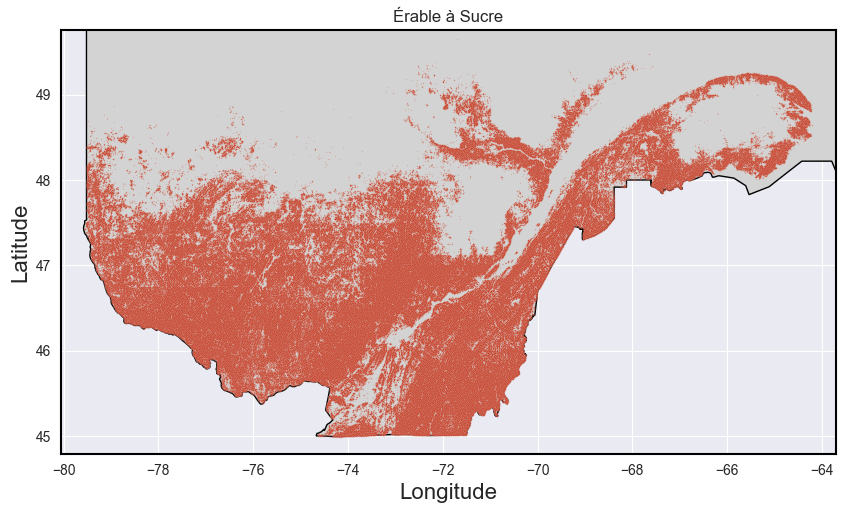

In [14]:
# Filter for EO in the essence column
eo_data = db[db['essence'] == 'EO']

# Create the plot with a taller figure size
plt.figure(figsize=(10, 15))

# Plot the Quebec shapefile
quebec_map.plot(ax=plt.gca(), color='lightgray', edgecolor='black')

# Plot the EO occurrences on top of the shapefile
sns.scatterplot(x='longitude', y='latitude', data=eo_data, color='#ca361c', s=1, alpha=0.2)

# Set zoom by focusing on the data point ranges (adjust as necessary)
plt.xlim([eo_data['longitude'].min() - 0.5, eo_data['longitude'].max() + 0.5])
plt.ylim([eo_data['latitude'].min() - 0.2, eo_data['latitude'].max() + 0.10])

# Adjust aspect ratio to stretch the height
plt.gca().set_aspect(1.8)

# Set plot details
plt.title('Érable à Sucre')
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
# Save the plot as PNG with transparency
plt.savefig('images/red_occurrences_map.png', transparent=True, dpi=300)

# Display the plot
plt.show()

In [8]:
eo_data.to_csv('data/db_red_maple.csv', index=False)

In [9]:
eo_data

,Unnamed: 0,essence,latitude,forest,longitude,elev,ph,clay,sand,bio1,...,bio15,bio18,bio20,bio23,bio24,bio27,bio30,bio31,bio34,cluster_k
0,577458,EO,47.761208,100,-73.022446,344,4.5000,85.0,85.0,1.765863,...,24.643180,301.000,19.051277,78.625160,588.10000,35.535050,-6.559094,9.199162,733.57570,1
1,1033211,EO,46.432621,100,-75.445401,239,5.1067,13.0,51.0,3.338708,...,12.093941,294.750,17.747839,75.759040,625.57500,33.815228,-1.487061,8.546481,798.44330,3
2,911397,EO,46.028920,100,-74.745012,285,5.5000,2.0,93.0,2.942621,...,12.358034,304.150,16.637333,82.134315,653.25000,33.674984,-4.342159,6.658854,784.00290,3
3,69869,EO,46.839032,100,-70.519246,363,3.5167,24.0,45.0,3.264520,...,17.166555,343.700,15.861320,91.072400,721.94995,32.355210,-5.601314,10.016439,715.82350,0
4,1521793,EO,48.080635,91,-79.398379,331,5.7000,90.0,0.0,0.868738,...,24.928170,261.750,20.987915,76.240395,541.90000,36.527588,-11.209414,9.943170,717.10360,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847957,772824,EO,45.995362,100,-74.002996,372,6.1000,69.0,4.0,4.209070,...,9.217865,285.925,17.601393,72.901840,636.12500,32.952133,-0.846002,3.312908,781.30550,3
847958,1073892,EO,46.137758,100,-75.599060,328,4.6167,4.0,81.0,3.904474,...,12.178079,280.350,19.275383,68.300415,591.17500,33.885113,-0.613117,7.181046,802.66705,3
847959,1336875,EO,46.359258,100,-77.158444,318,4.5000,85.0,85.0,3.932580,...,16.052400,237.125,23.497679,59.750330,521.40000,34.233120,-2.733226,9.741150,812.64520,1
847960,403313,EO,47.485293,100,-68.537980,362,4.8000,8.0,34.0,2.571893,...,15.102576,275.700,18.190674,79.534220,590.47500,32.157380,-2.661742,8.380980,732.18720,3


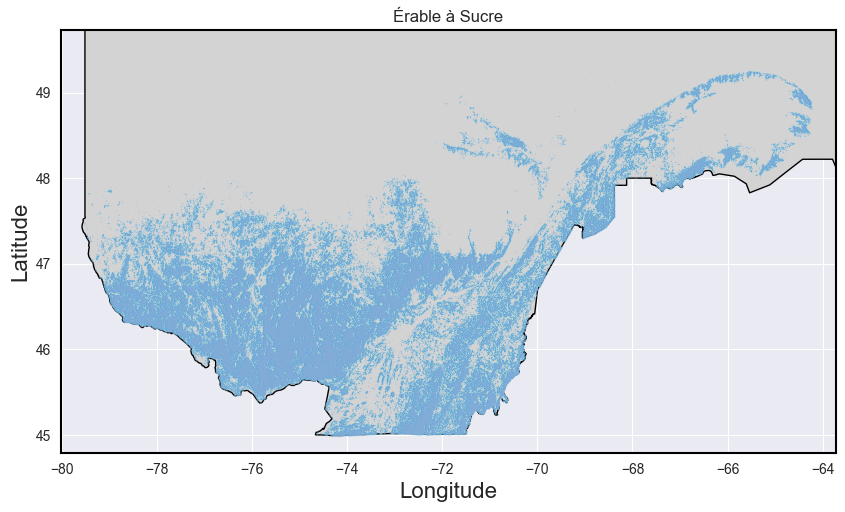

In [15]:
# Filter for EO in the essence column
es_data = db[db['essence'] == 'ES']

# Create the plot with a taller figure size
plt.figure(figsize=(10, 15))

# Plot the Quebec shapefile
quebec_map.plot(ax=plt.gca(), color='lightgray', edgecolor='black')

# Plot the EO occurrences on top of the shapefile
sns.scatterplot(x='longitude', y='latitude', data=es_data, color='#51a7dc', s=1, alpha=0.2)

# Set zoom by focusing on the data point ranges (adjust as necessary)
plt.xlim([es_data['longitude'].min() - 0.5, es_data['longitude'].max() + 0.5])
plt.ylim([es_data['latitude'].min() - 0.2, es_data['latitude'].max() + 0.10])

# Adjust aspect ratio to stretch the height
plt.gca().set_aspect(1.8)

# Set plot details
plt.title('Érable à Sucre')

plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)
# Save the plot as PNG with transparency
plt.savefig('images/EO_occurrences_map.png', transparent=True, dpi=300)

# Display the plot
plt.show()

In [11]:
es_data

,Unnamed: 0,essence,latitude,forest,longitude,elev,ph,clay,sand,bio1,...,bio15,bio18,bio20,bio23,bio24,bio27,bio30,bio31,bio34,cluster_k
847962,1,ES,47.996187,94,-68.500146,364,4.2000,11.0,56.0,2.377832,...,13.184971,286.625,16.870762,86.148476,633.375,32.459473,-1.594780,7.549124,708.93280,2
847963,2,ES,47.849696,100,-68.513409,392,4.2000,11.0,56.0,2.377832,...,13.184971,286.625,16.870762,86.148476,633.375,32.459473,-1.594780,7.549124,708.93280,2
847964,25,ES,48.006817,100,-69.845383,263,4.3200,4.0,85.0,1.877924,...,10.672174,275.200,16.294031,90.193054,615.300,31.653698,-2.362497,5.388228,645.53110,2
847965,46,ES,47.464966,100,-69.830670,187,3.5167,24.0,45.0,2.599420,...,12.382082,285.675,17.312328,82.792880,613.000,31.961720,-1.030399,6.622469,701.65955,2
847966,52,ES,47.692467,100,-68.633707,334,3.8233,16.0,43.0,2.377832,...,13.184971,286.625,16.870762,86.148476,633.375,32.459473,-1.594780,7.549124,708.93280,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413265,1658294,ES,48.267805,98,-68.241756,388,4.2000,11.0,56.0,1.643488,...,12.637121,267.200,15.901118,91.217125,606.500,31.554630,0.717934,4.496501,666.30770,2
1413266,1658300,ES,48.226767,91,-68.151074,442,3.8233,16.0,43.0,1.643488,...,12.637121,267.200,15.901118,91.217125,606.500,31.554630,0.717934,4.496501,666.30770,2
1413267,1658302,ES,48.226779,96,-68.148912,414,3.8233,16.0,43.0,1.643488,...,12.637121,267.200,15.901118,91.217125,606.500,31.554630,0.717934,4.496501,666.30770,2
1413268,1658309,ES,48.619350,37,-67.341882,197,4.2000,11.0,56.0,1.677881,...,17.265238,296.875,15.893673,96.534830,630.800,31.110240,-2.917435,6.463537,658.10010,2


In [12]:
es_data.to_csv('data/db_sugar_maple.csv', index=False)